predicted=10382.157612, expected=300.000000
predicted=17630.837832, expected=66450.000000
predicted=21563.638022, expected=1.000000
predicted=22297.443069, expected=1.000000
predicted=8621.346319, expected=4299.000000
predicted=19450.099818, expected=8375.000000
predicted=31273.935885, expected=14431.000000
predicted=13183.571320, expected=29231.000000
predicted=15445.329801, expected=26181.000000
predicted=23954.123513, expected=62225.000000
predicted=19375.811638, expected=16371.000000
predicted=22283.982348, expected=13337.000000
predicted=23871.609747, expected=24957.000000
predicted=23494.796670, expected=22465.000000
predicted=30778.043677, expected=33509.000000
predicted=17255.864044, expected=27614.000000
predicted=21420.209625, expected=37844.000000
predicted=38516.042318, expected=29999.000000
predicted=22995.290891, expected=18792.000000
predicted=23252.639541, expected=97007.000000
predicted=33893.173972, expected=69360.000000
predicted=40301.954884, expected=58208.000000
p

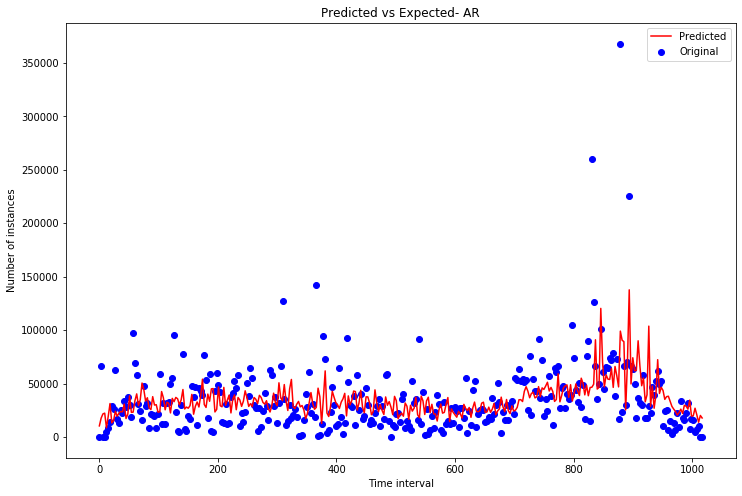

In [17]:
#AR MODEL 
#referred from "https://machinelearningmastery.com/autoregression-models-time-series-forecasting-python/"
import pandas as pd
import matplotlib.pyplot as plt
import csv
import numpy as np
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
from math import sqrt



df2=pd.read_csv('final_input_file.csv')
X = df2['no_of_instances'].values
time1=df2['time_interval'].values
df3=pd.read_csv('testing.csv')
# split dataset
#X = series.values
train, test = X[0:340], X[0:340]

# train autoregression
model = AR(train)
model_fit = model.fit()
window = model_fit.k_ar
coef = model_fit.params
# walk forward over time steps in test
history = train[len(train)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
times=[]
for t in range(len(test)):
    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    yhat = coef[0]
    for d in range(window):
        yhat += coef[d+1] * lag[window-d-1]
    obs = test[t]
    
    if(yhat<0):
        predictions.append(test[t])
        times.append(df2.time_interval[t])
    else:
        predictions.append(yhat)
        times.append(df2.time_interval[t])
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
    
time2=list()
for i in range(len(time1)-119,len(time1)):
    time2.append(time1[i])    


sumAPE=0
for i in range(len(predictions)):
    
    APE=0
    APE=abs((test[i]-predictions[i])/test[i])
    sumAPE=sumAPE+APE
#print(test)
#print(predictions)
MAPE=sumAPE/150
print('MAPE',MAPE*100)
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)


prediction=np.array(predictions)


fig=plt.figure(figsize=(12,8))
plt.title("Predicted vs Expected- AR")
plt.xlabel("Time interval")
plt.ylabel("Number of instances")
plt.plot(df2.time_interval, prediction, color='red', label='Predicted')
plt.scatter(df2.time_interval, X, color='blue', label='Original', linestyle='solid')
plt.legend()
plt.show()

